### Orthorectify GOES-R ABI images that correspond with specific ASTER observation times

Use latitude/longitude bounds to specify the area of interest, download a DEM for that area and use that DEM in the orthorectifiation.

In [506]:
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray
import os
import glob
import aster_utils
import goes_utils
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/spestana/git/goes-ortho/')
import goes_ortho

import warnings
warnings.filterwarnings('ignore')

In [497]:
def nearest(items, pivot):
    # https://stackoverflow.com/questions/32237862/find-the-closest-date-to-a-given-date
    return min(items, key=lambda x: abs(x - pivot))

In [123]:
#python ./download-goes.py --bucket noaa-goes16 --year 2021 --month 6 --days 1 30 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2021 --month 7 --days 1 31 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes17 --year 2021 --month 6 --days 1 30 --product ABI-L1b-RadC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L2-LST --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 4 --days 12 14 --product ABI-L2-LST --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 4 --days 12 14 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 3 --days 4 6 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 25 27 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 7 9 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 1 3 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 1 --days 22 24 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 1 --days 6 8 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 5 --days 27 29 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 4 --days 26 28 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 1 --days 12 14 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 12 --days 18 20 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 11 --days 25 27 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 5 --days 16 18 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 4 --days 7 9 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 3 --days 22 24 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 6 --days 15 17 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 6 --days 6 8 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 5 --days 22 24 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L2-LSTC --channel C14 --bounds 30 50 -125 -105 --dir /storage/GOES

In [124]:
#files = glob.glob("/storage/GOES/goes16/*/*/*/ABI-L2-LSTC/*/*.nc")

In [125]:
#ds = xr.open_dataset(files[0])

In [126]:
#ds

Specify directories for inputs and outputs

In [127]:
## directory containing ASTER L1T geotiffs, we'll grab the datetime of each from their filenames
#aster_directory = "/storage/spestana/ASTER/AST_L1T/geotiff/T/T_band14_Tuolumne-and-CUES"
#
## the top level directory that contains all the GOES-16 ABI files we want to search
#goes_directory = "/storage/GOES/goes16"
#
## the top level directory that we will output all orthorectified GOES images to
## folder structure within will mirror our source goes_directory
#output_directory = "/storage/GOES/orthorectified"
#
## filepath and filename to save the DEM to
#dem_filepath = 'dem/tuolumne_cues_dem.tif'
## latitude and longitude bounds for the DEM
#dem_bounds = (-120, 36.8, -118.25, 38.5)
#
#print('\n\nThis script will search for ASTER geotiff files within:\n\t{}\nand for each one, will find a corresponding GOES ABI image within:\n\t{}'.format(aster_directory, goes_directory))
#print('Each corresponding GOES observation will be orthorectified and cropped to the bounds of this DEM:\n\t{}\n\t{}'.format(dem_filepath,dem_bounds))
#print('And the resulting orthorectified and cropped GOES ABI image will be output to:\n\t{}'.format(output_directory))
##input("\n\t\tIf this is correct, press Enter to continue...\n\t\tIf this is NOT correct, press Ctrl+C to stop the script and exit.")
#

#### Download a DEM

In [128]:
## download DEM (make sure to convert to GRS80 ellipsoid model GOES ABI fixed grid uses)
#goes_ortho.get_dem(demtype='SRTMGL3', bounds=dem_bounds, out_fn=dem_filepath, proj='+proj=lonlat +datum=GRS80') 

#### Get the times of all our ASTER observations (in UTC)

In [129]:
#aster_df = aster_utils.aster_timestamps(aster_directory, ext='tif')

#### Find GOES ABI images that are closest to these ASTER observations and orthorectify

In [130]:
#for x in aster_df.timestampUTC:
#    print(x.strftime('%-m'))

In [131]:
#aster_counter = 0
## for every ASTER datetime (in UTC)
#for aster_datetime_UTC in aster_df.timestampUTC:
#    # count
#    aster_counter += 1
#    print('\n\n File {} of {}'.format(aster_counter, aster_df.shape[0]))
#    print('\nFor ASTER observation at {}'.format(aster_datetime_UTC))
#    # find the GOES subdirectory for the corresponding year-month-day and hour
#    goes_subdir = r"/{year}/{month}/{day}/{product}/{hour}/".format(
#                            goes_directory=goes_directory, 
#                            year=aster_datetime_UTC.strftime('%Y'), 
#                            month=aster_datetime_UTC.strftime('%-m'), 
#                            day=aster_datetime_UTC.day, 
#                            product='ABI-L2-LSTC', 
#                            hour=aster_datetime_UTC.strftime('%H'))
#    # now within this subdirectory, the same hour of this ASTER observation
#    print('\nSearching for GOES ABI imagery within:\n{}{}'.format(goes_directory,goes_subdir))
#    # get the filenames of each GOES ABI image in this subdirectory
#    goes_files = glob.glob(goes_directory+goes_subdir+'*.nc')
#    if len(goes_files) != 0:
#        goes_datetimes_UTC_list = []
#        goes_files_list = []
#        
#        # create an empty dictionary we'll fill with filenames and timestamps for each subdirectory we search
#        goes_dict = {}
#        
#        for this_goes_file in goes_files:
#            this_goes_filename = this_goes_file.split('/')[-1]
#            #print('\t{}'.format(this_goes_filename))
#            
#            # parse the timstamp in the filename 
#            this_goes_datetime_UTC = this_goes_filename.split('_')[-1].split('.')[0][1:-1]
#            this_goes_datetime_UTC = pd.to_datetime(this_goes_datetime_UTC, format="%Y%j%H%M%S")
#            this_goes_datetime_UTC = pd.Timestamp(this_goes_datetime_UTC, tz='UTC')
#            #print('\t{}'.format(this_goes_datetime_UTC))
#            
#            # add these to our dictionary, use the date as the key
#            goes_dict[this_goes_datetime_UTC] = {}
#            goes_dict[this_goes_datetime_UTC]['filepath'] = this_goes_file
#            
#            
#        # now find the one closest to our ASTER observation
#        nearest_goes_datetime_UTC = nearest(list(goes_dict.keys()), aster_datetime_UTC)
#        #print('\t{} -- {}'.format(aster_datetime_UTC, nearest_goes_datetime_UTC))
#        nearest_goes_filepath = goes_dict[nearest_goes_datetime_UTC]['filepath']
#        #print(goes_dict[nearest_goes_datetime_UTC]['filepath'])
#        print('\n\tFound nearest GOES ABI image:\n\t\tASTER datetime:\t{}\n\t\tGOES datetime:\t{}\n\t\tGOES filepath:\t{}'.format(
#                aster_datetime_UTC, nearest_goes_datetime_UTC, nearest_goes_filepath))
#        
#        
#        
#        # create the output directory if it does not already exist
#        output_subdir = r"{}{}".format(output_directory,goes_subdir)
#        print('\n\tPreparing to output files to:\n\t{}'.format(output_subdir))
#        if not os.path.exists(output_subdir):
#            os.makedirs(output_subdir)   
#        # create a new filename for the orthorectified image
#        new_file_name = nearest_goes_filepath.split('/')[-1].split('.')[0] + '_orthorectified'
#        print('\n\tNew files will be called:\n\t{}.*'.format(new_file_name))
#        # Generate the pixel mapping that relates GOES ABI pixels to points on the DEM surface
#        pixel_map = goes_ortho.make_ortho_map(nearest_goes_filepath, dem_filepath)
#        # Apply the pixel mapping to orthorectify the GOES ABI image
#        ds = goes_ortho.orthorectify_abi(nearest_goes_filepath, 
#                                         pixel_map,
#                                         data_vars = ['LST','DQF'],
#                                         out_filename='{}{}.nc'.format(output_subdir,new_file_name))

### Convert the new NetCDF files to GeoTiffs

In [132]:
## get all the files here
#filepaths = glob.glob('/storage/GOES/orthorectified/**/*ABI-L2-LSTC-*orthorectified*.nc', recursive=True)
#
#for i, filepath in enumerate(filepaths):
#    
#    # only get netcdf files
#    if os.path.splitext(os.path.normpath(filepath))[-1] == '.nc':
#    
#        print('Converting file {} of {}'.format(i+1, len(filepaths)))
#        print(filepath)
#        
#        # get the orthorectified GOES NetCDF filepath
#        netcdf_filepath = os.path.normpath(filepath)
#        
#        # create a geotiff for Radiance, Brightness Temperature, and zone_labels for zonal statistics
#        for band in ['LST', 'DQF', 'zone_labels']:
#            # make a filepath for the new tif file
#            geotiff_filepath = '{}_{}.tif'.format(os.path.splitext(netcdf_filepath)[0],band)
#            
#            # using gdal in the command line here to convert
#            os.system('gdal_translate -a_srs {a_srs} -of GTiff NETCDF:{netcdf_filepath}:{band} {geotiff_filepath}'.format(
#                a_srs = 'EPSG:4326',
#                netcdf_filepath = netcdf_filepath,
#                geotiff_filepath = geotiff_filepath,
#                band = band))

---

In [133]:
#python ./download-goes.py --bucket noaa-goes16 --year 2021 --month 6 --days 1 30 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2021 --month 7 --days 1 31 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes17 --year 2021 --month 6 --days 1 30 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 4 --days 12 14 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 4 --days 12 14 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 3 --days 4 6 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 25 27 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 7 9 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 2 --days 1 3 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 1 --days 22 24 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2020 --month 1 --days 6 8 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 5 --days 27 29 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 4 --days 26 28 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2019 --month 1 --days 12 14 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 12 --days 18 20 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 11 --days 25 27 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 5 --days 16 18 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 4 --days 7 9 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2018 --month 3 --days 22 24 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 6 --days 15 17 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 6 --days 6 8 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 5 --days 22 24 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES
#python ./download-goes.py --bucket noaa-goes16 --year 2017 --month 4 --days 20 22 --product ABI-L1b-RadC --channel C15 --bounds 30 50 -125 -105 --dir /storage/GOES

In [134]:
# Jan 7th 2020 band 15 (12 micron) images
#files = glob.glob("/storage/GOES/goes16/2020/1/7/ABI-L1b-RadC/*/C15/*.nc")

In [135]:
#print(files[71].split("/")[-1])
#print(rad_filepaths[111].split("/")[-1])

In [136]:
#dem_filepath = 'dem/tuolumne_cues_dem.tif'
#
#pixel_map = goes_ortho.make_ortho_map(files[71], dem_filepath)
#
#ds = goes_ortho.orthorectify_abi(files[71], 
#                                 pixel_map,
#                                 data_vars = ['Rad'],
#                                 out_filename=files[71].split(".")[0]+"_orthorectified.nc")

In [137]:
## get all the files here
#filepaths = ['/storage/GOES/goes16/2020/1/7/ABI-L1b-RadC/06/C15/OR_ABI-L1b-RadC-M6C15_G16_s20200070606176_e20200070608555_c20200070609099_orthorectified.nc']
#
#for i, filepath in enumerate(filepaths):
#    
#    # only get netcdf files
#    if os.path.splitext(os.path.normpath(filepath))[-1] == '.nc':
#    
#        print('Converting file {} of {}'.format(i+1, len(filepaths)))
#        print(filepath)
#        
#        # get the orthorectified GOES NetCDF filepath
#        netcdf_filepath = os.path.normpath(filepath)
#        
#        # create a geotiff for Radiance, Brightness Temperature, and zone_labels for zonal statistics
#        for band in ['Rad', 'tb', 'zone_labels']:
#            # make a filepath for the new tif file
#            geotiff_filepath = '{}_{}.tif'.format(os.path.splitext(netcdf_filepath)[0],band)
#            
#            # using gdal in the command line here to convert
#            os.system('gdal_translate -a_srs {a_srs} -of GTiff NETCDF:{netcdf_filepath}:{band} {geotiff_filepath}'.format(
#                a_srs = 'EPSG:4326',
#                netcdf_filepath = netcdf_filepath,
#                geotiff_filepath = geotiff_filepath,
#                band = band))

In [139]:
#!ls /storage/GOES/goes16/2020/1/7/ABI-L1b-RadC/06/C15/

---

Constants for converting radiance to LST from the ATBD:

| Conditions | C | A_1 | A_2 | A_3 | D |
| --- | --- | --- | --- | --- | --- |
| Day/Dry | 45.257935 | 0.985361 | 1.332220 | -41.750015 | 0.035390 |
| Day/Moist | 52.651920 | 0.930713 | 2.408630 | -35.962742 | -0.219514 |
| Night/Dry | 44.597870 | 0.989985 | 1.065721 | -41.896751 | 0.083246 |
| Night/Moist | 61.992481 | 0.892190 | 2.721928 | -33.987152 | -0.284960 |

In [498]:
day_dry =     {"C"  : 45.257935, "A_1": 0.985361, "A_2": 1.332220, "A_3": -41.750015, "D": 0.035390}
day_moist =   {"C"  : 52.651920, "A_1": 0.930713, "A_2": 2.408630, "A_3": -35.962742, "D": -0.219514}
night_dry =   {"C"  : 44.597870, "A_1": 0.989985, "A_2": 1.065721, "A_3": -41.896751, "D": 0.083246}
night_moist = {"C"  : 61.992481, "A_1": 0.892190, "A_2": 2.721928, "A_3": -33.987152, "D": -0.284960}

In [499]:
def splitWindowLST(constants_dict, Tb_11, Tb_12, e, lza):
    
    '''Compute GOES-R ABI LST from 11 micron (Tb_11) and 12 micron (Tb_12) brightness temperatures,
    given a set of constants (constants_dict), emissivity (e), and local zenith angle (lza).'''
    
    C = constants_dict['C']
    A_1 = constants_dict['A_1']
    A_2 = constants_dict['A_2']
    A_3 = constants_dict['A_3']
    D = constants_dict['D']
    
    LST = C + A_1*Tb_11 + A_2*(Tb_11-Tb_12) + A_3*e + D*(Tb_11-Tb_12)*(1/np.cos(np.radians(lza)) -1)
    
    return LST

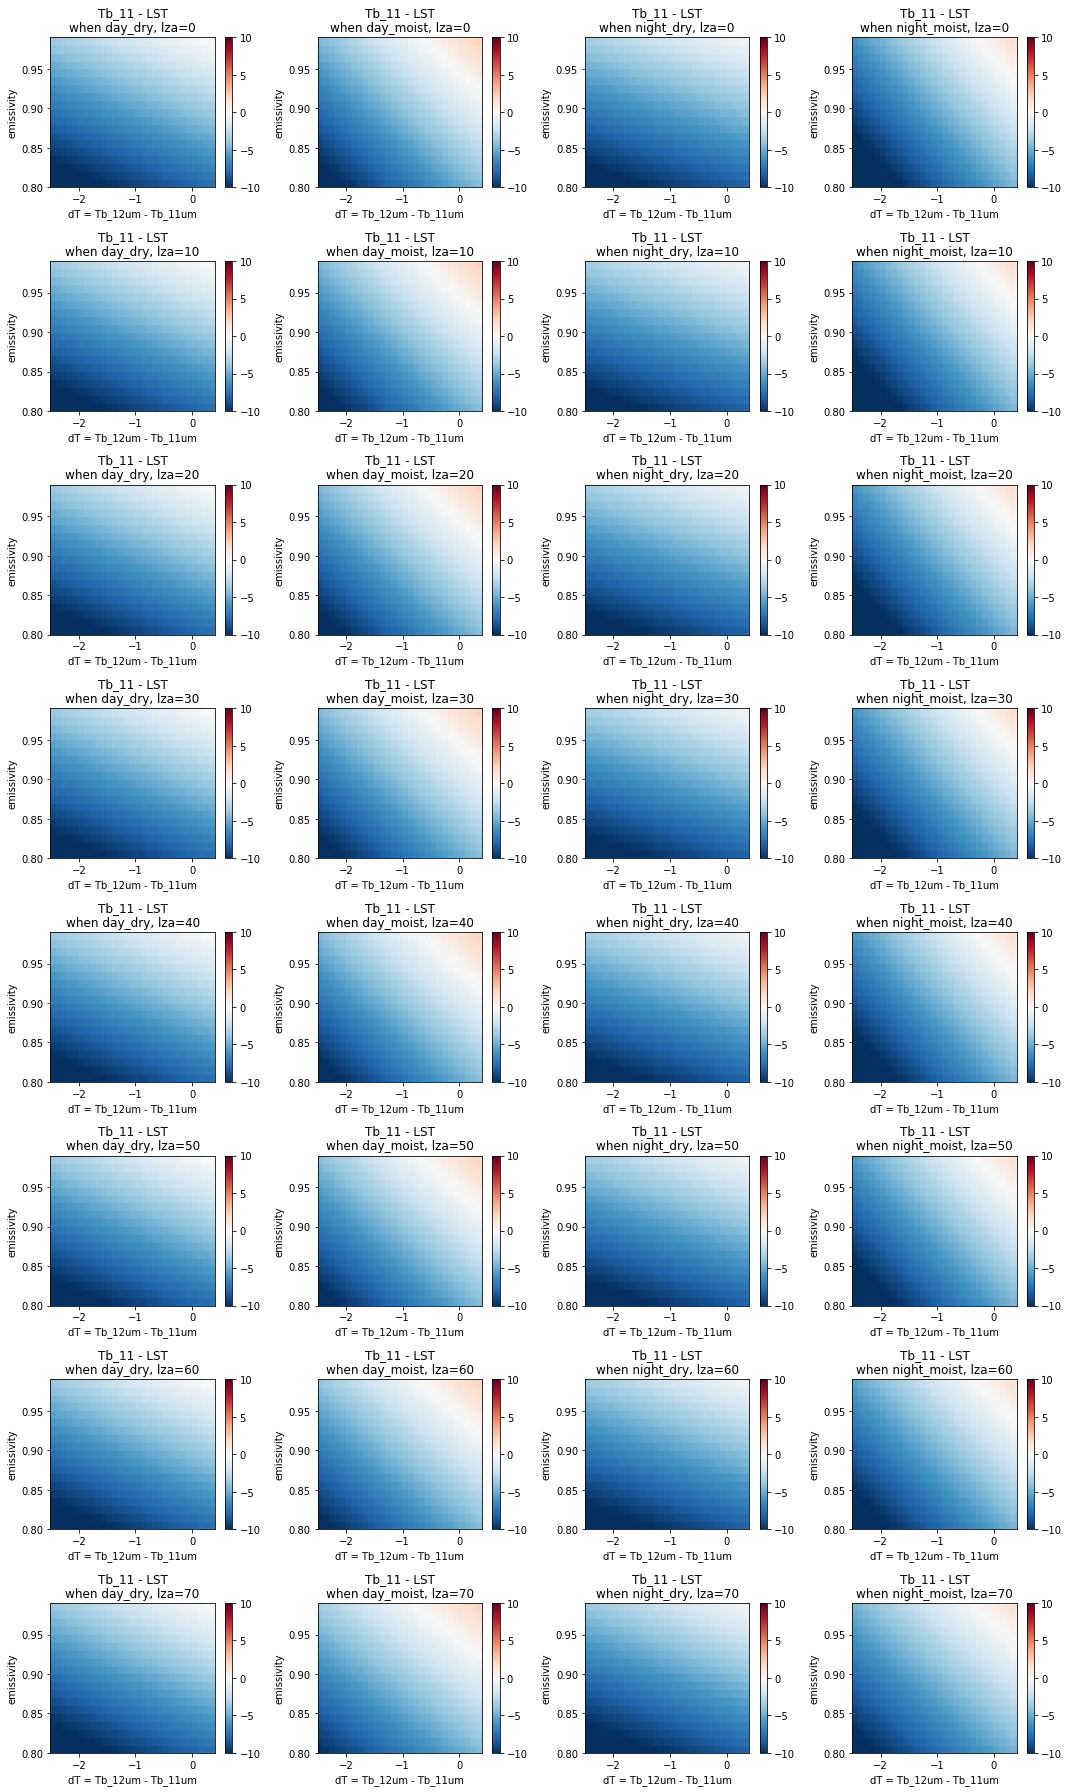

In [368]:
# What does the LST algorithm look like if we vary emissivity, lza, and the two thermal bands?

# 11 micron brightness temp
Tb_11 = 273.15
lza = np.arange(0,80,10)

atmos_condition = ['day_dry', 'day_moist', 'night_dry', 'night_moist']
all_dT = np.arange(-2.5, .5, 0.1)
all_e = np.arange(0.8,1.0,0.01)

## plot as lza vs emissivity
#Y = lza
#
#for i, constants_dict in enumerate([day_dry, day_moist, night_dry, night_moist]):
#    for dT in all_dT:
#        Tb_12 = Tb_11 + dT
#        each_lst=[]
#        for e in all_e:
#            this_lst = splitWindowLST(constants_dict, Tb_11, Tb_12, e, lza)
#            each_lst.append(this_lst)
#            #plt.figure(figsize=(3,3),tight_layout=True)
#            #plt.plot(lza, this_lst)
#            #plt.axhline(Tb_11,linestyle='--', color='k')
#            #plt.title(f'{atmos_condition[i]}, dT={dT}, e={e}')
#            #plt.xlabel('lza')
#            #plt.ylabel('lst')
#            #plt.ylim(270,300)
#            #plt.xlim(0,70)
#        lst = Tb_11-np.vstack(each_lst)
#        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.5,3), tight_layout=True)
#        x, y = np.meshgrid(Y, all_e)
#        lst_img = ax.pcolormesh(x, y, lst, cmap='RdBu_r', vmin=-10, vmax=10);
#        plt.colorbar(lst_img);
#        ax.set_xlabel('LZA')
#        ax.set_ylabel('e')
#        ax.set_title(f'Tb_11 - LST when\n{atmos_condition[i]}, dT={np.round(dT,1)}');

# plot as dT vs emissivity
Y = all_dT

fig, ax = plt.subplots(nrows=len(lza), ncols=len(atmos_condition), figsize=(15,25), tight_layout=True)

for i, constants_dict in enumerate([day_dry, day_moist, night_dry, night_moist]):
    for j, this_lza in enumerate(lza):
        Tb_12 = Tb_11 + all_dT
        each_lst=[]
        for e in all_e:
            this_lst = splitWindowLST(constants_dict, Tb_11, Tb_12, e, this_lza)
            each_lst.append(this_lst)
            #plt.figure(figsize=(3,3),tight_layout=True)
            #plt.plot(lza, this_lst)
            #plt.axhline(Tb_11,linestyle='--', color='k')
            #plt.title(f'{atmos_condition[i]}, dT={dT}, e={e}')
            #plt.xlabel('lza')
            #plt.ylabel('lst')
            #plt.ylim(270,300)
            #plt.xlim(0,70)
        lst = Tb_11-np.vstack(each_lst)
        x, y = np.meshgrid(Y, all_e)
        lst_img = ax[j][i].pcolormesh(x, y, lst, cmap='RdBu_r', vmin=-10, vmax=10);
        plt.colorbar(lst_img,ax=ax[j][i]);
        ax[j][i].set_xlabel('dT = Tb_12um - Tb_11um')
        ax[j][i].set_ylabel('emissivity')
        ax[j][i].set_title(f'Tb_11 - LST\nwhen {atmos_condition[i]}, lza={np.round(this_lza,1)}');
            


In [546]:
tb_filepaths = glob.glob('/storage/GOES/orthorectified/**/*ABI-L1b-RadC-*orthorectified_tb.tif', recursive=True)
lst_filepaths = glob.glob('/storage/GOES/orthorectified/**/*ABI-L2-LSTC-*orthorectified_LST.tif', recursive=True)
dqf_filepaths = glob.glob('/storage/GOES/orthorectified/**/*ABI-L2-LSTC-*orthorectified_DQF.tif', recursive=True)

In [547]:
lst_timestamps = goes_utils.goes_timestamps(lst_filepaths)
dqf_timestamps = goes_utils.goes_timestamps(dqf_filepaths)

tb_timestamps = goes_utils.goes_timestamps(tb_filepaths)

tb_timestamps_list = list(tb_timestamps.keys())
lst_timestamps_list = list(lst_timestamps.keys())
dqf_timestamps_list = list(lst_timestamps.keys())

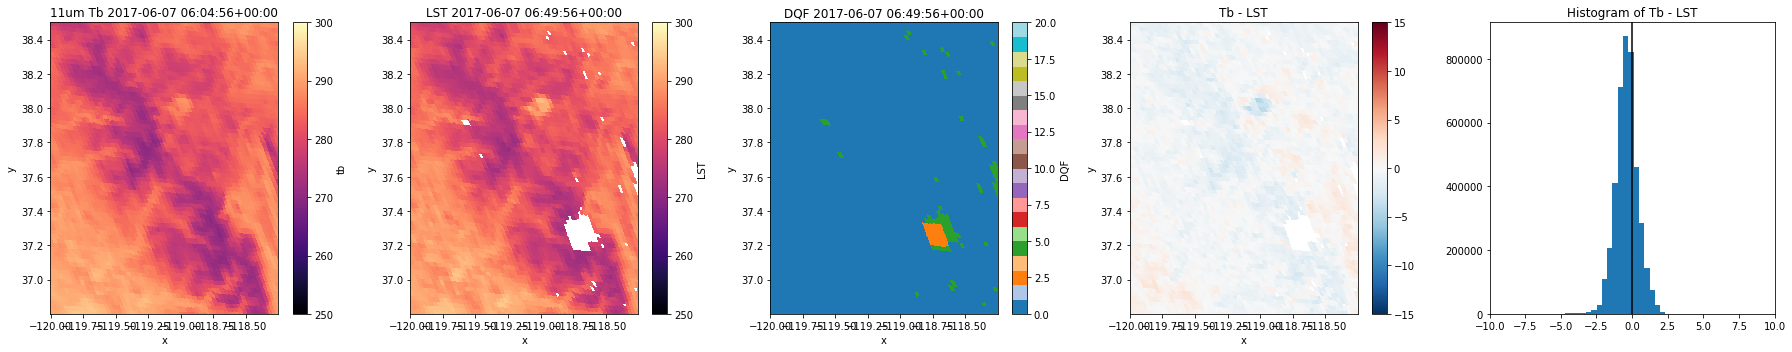

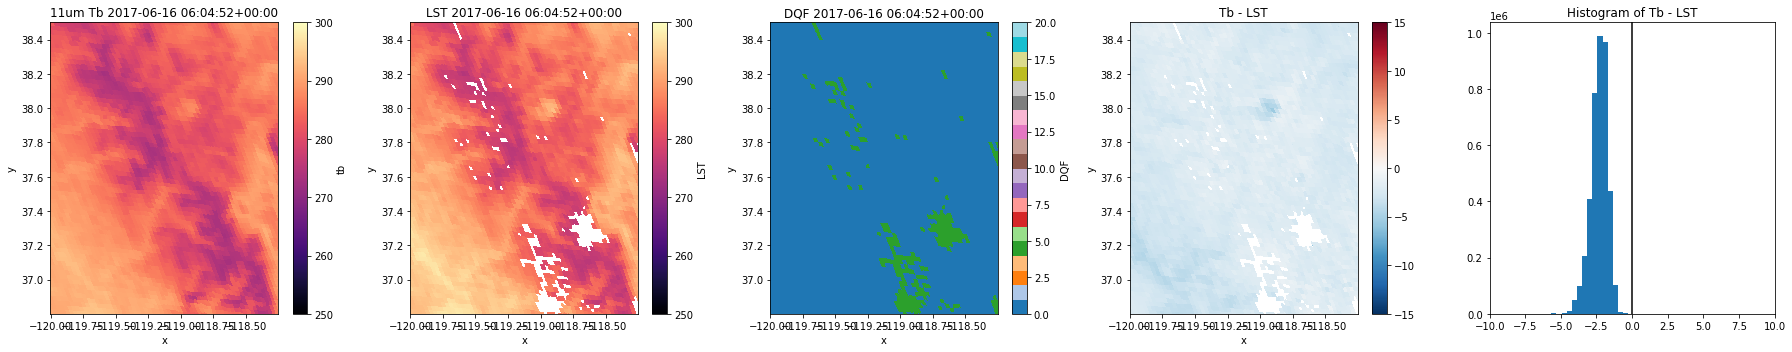

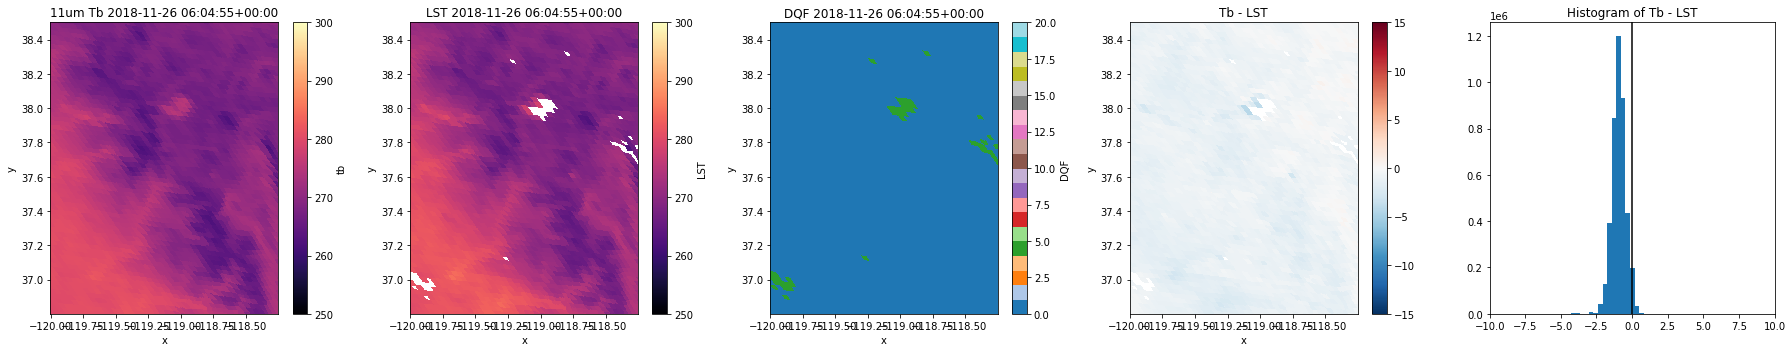

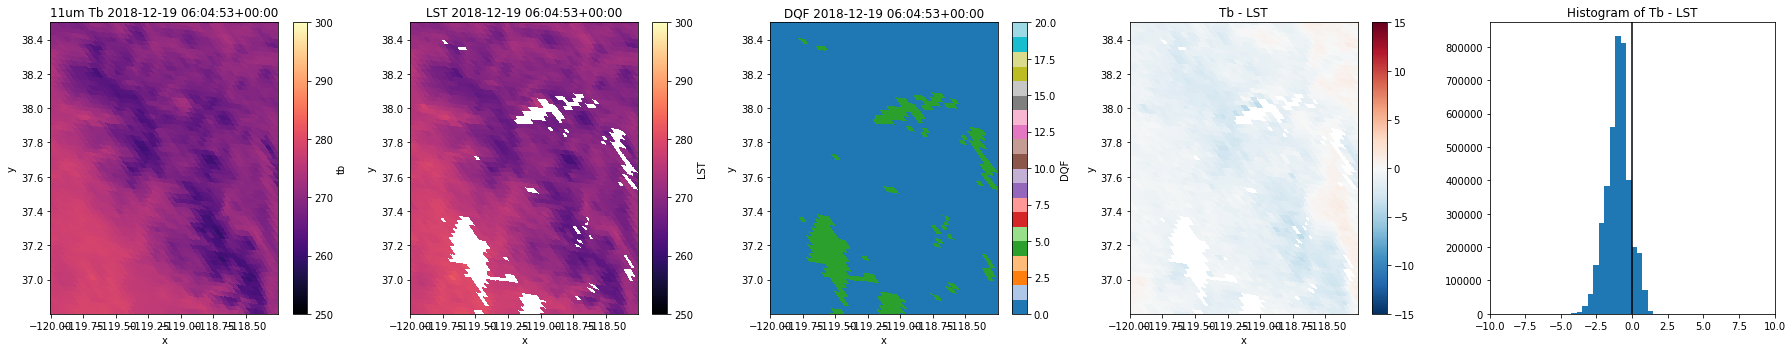

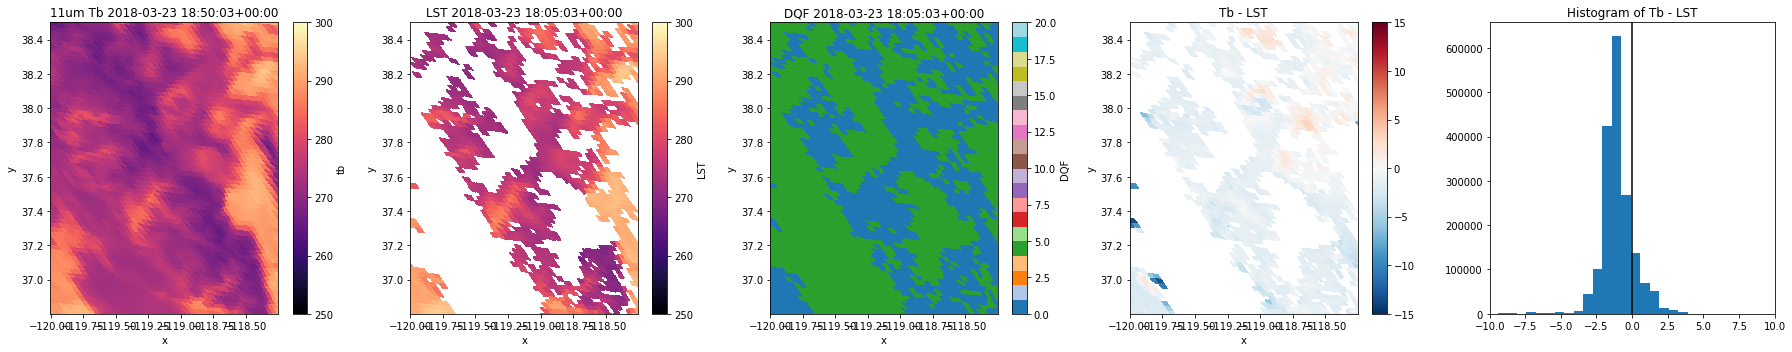

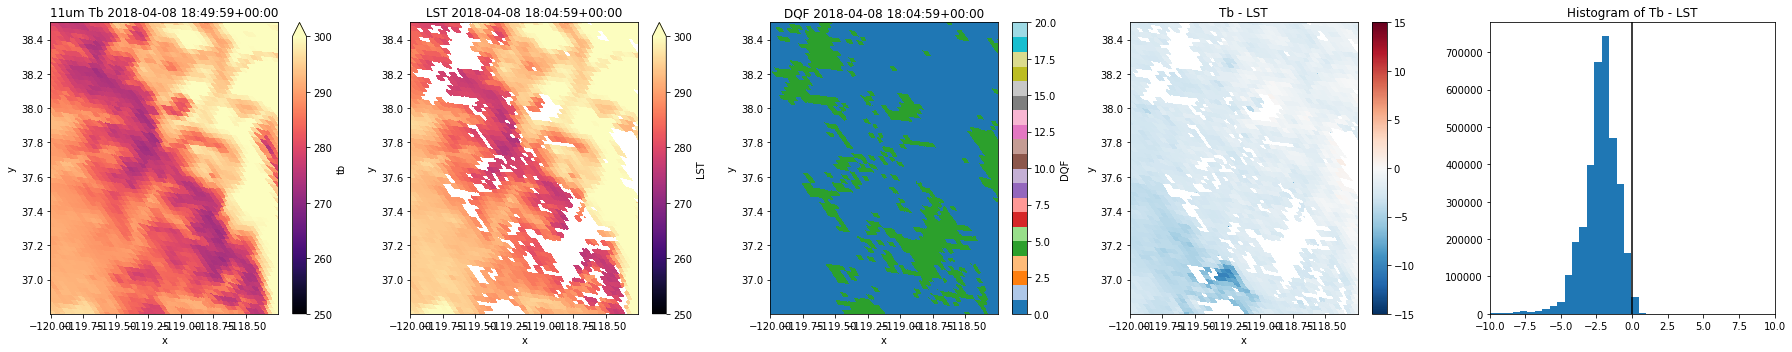

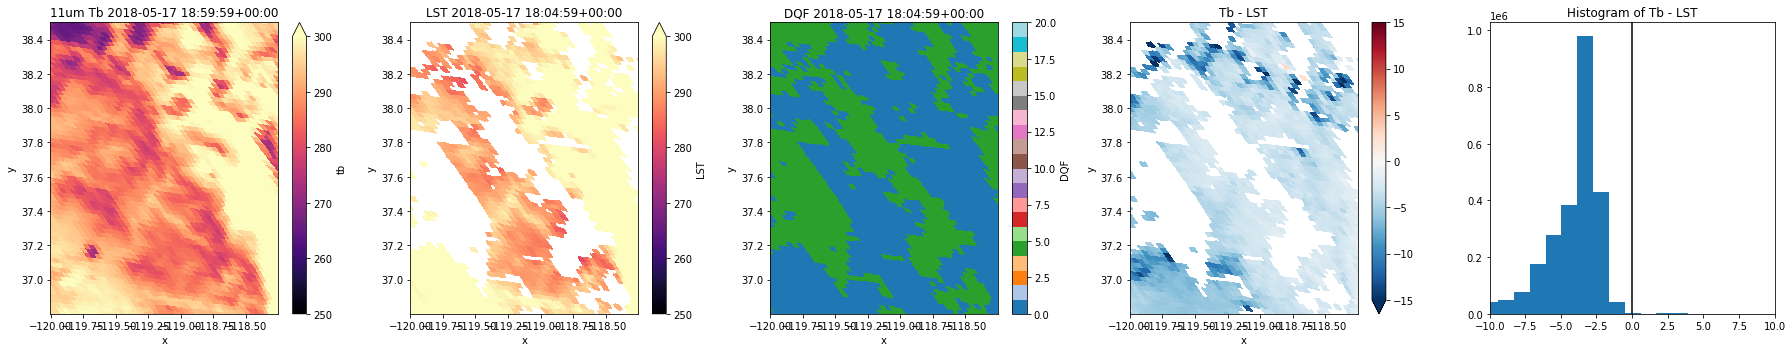

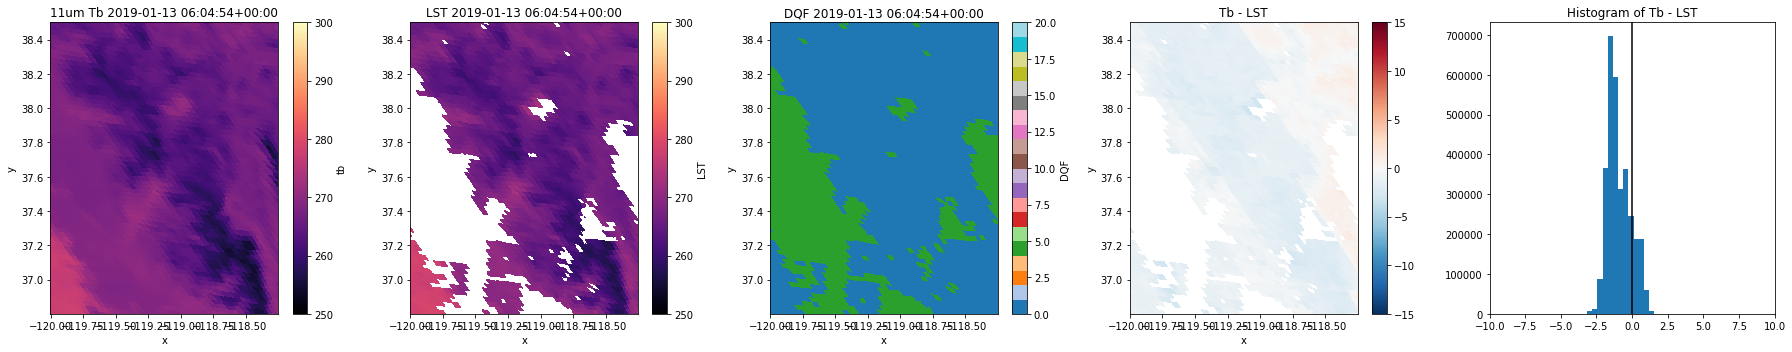

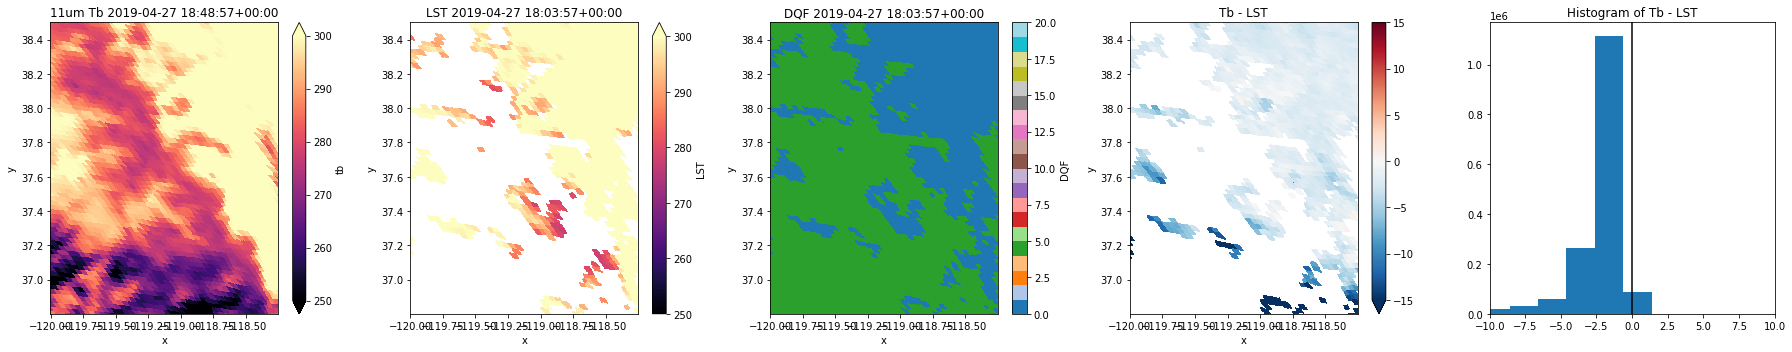

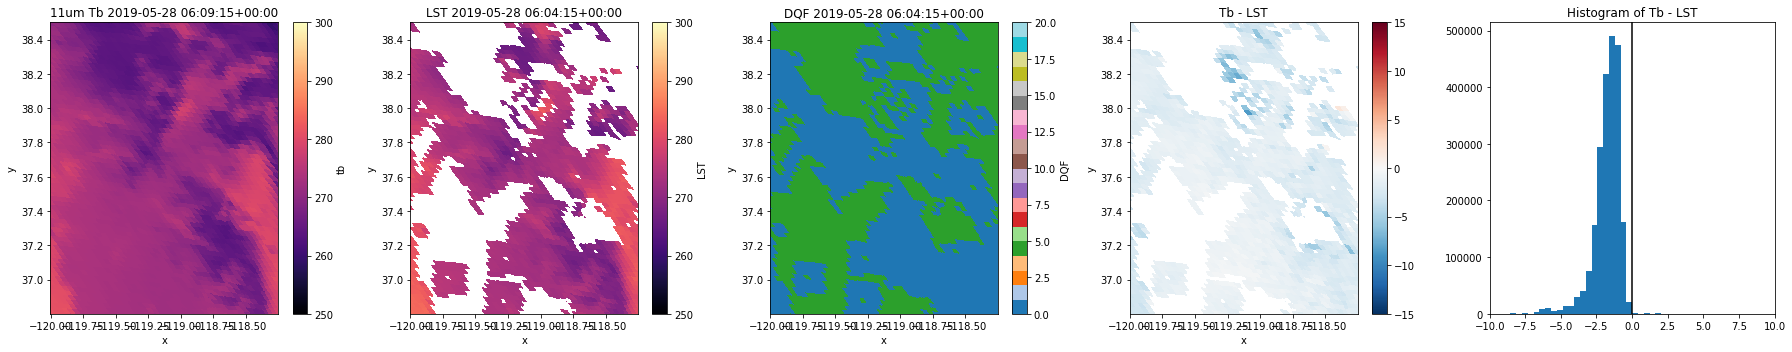

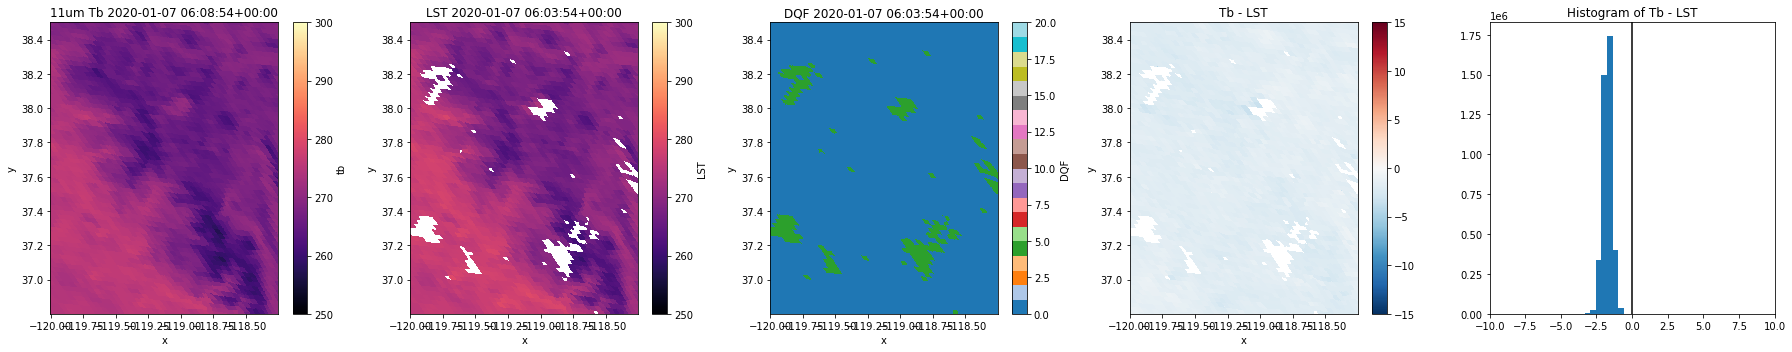

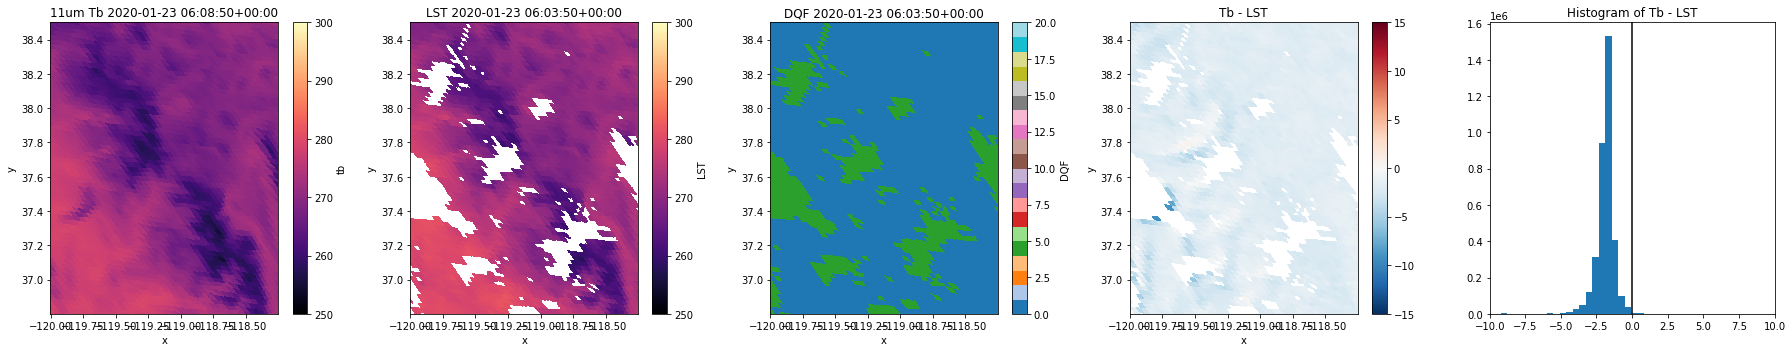

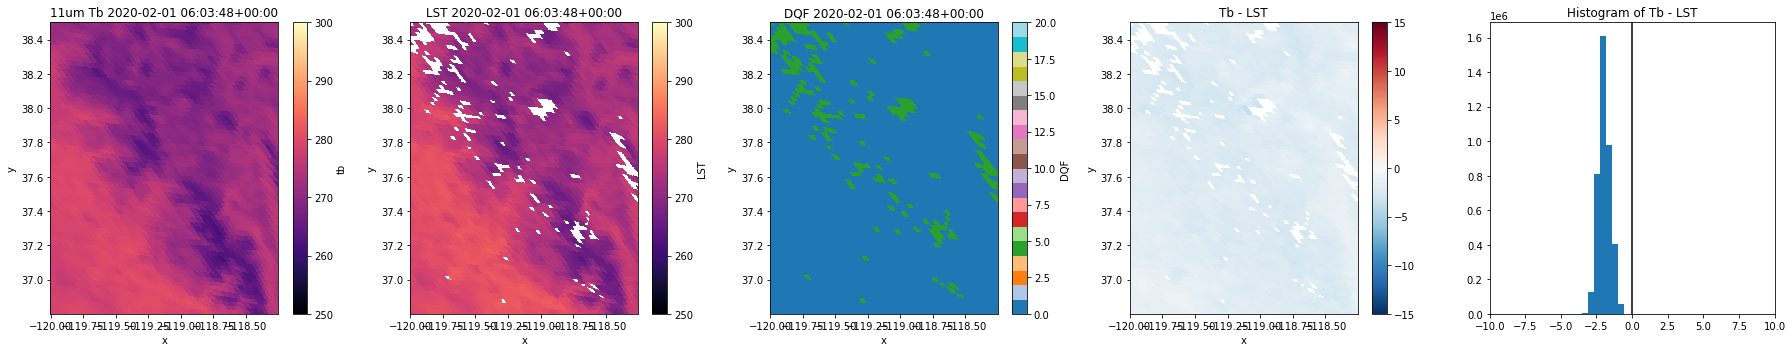

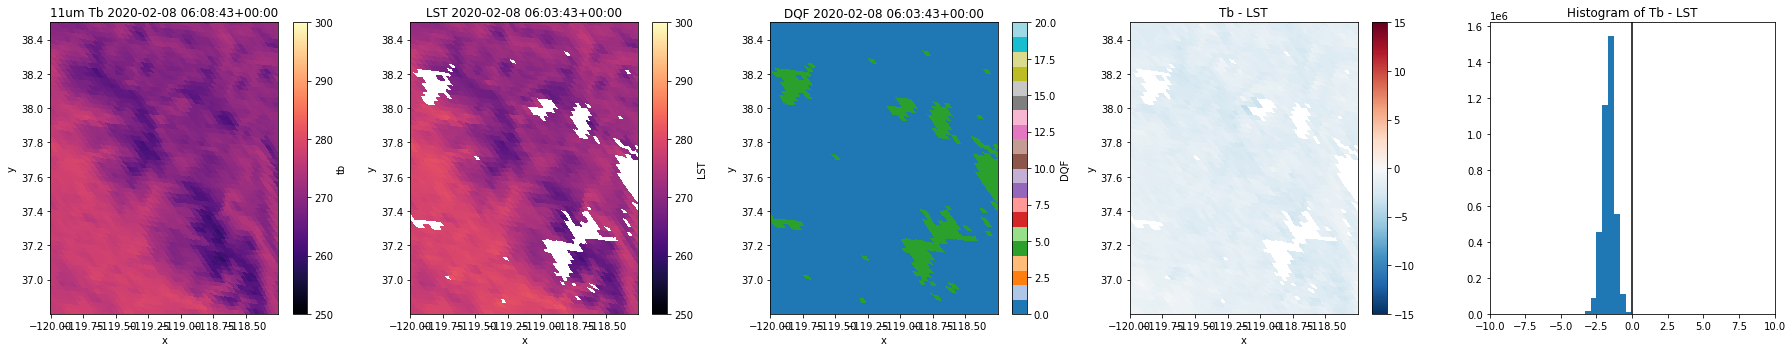

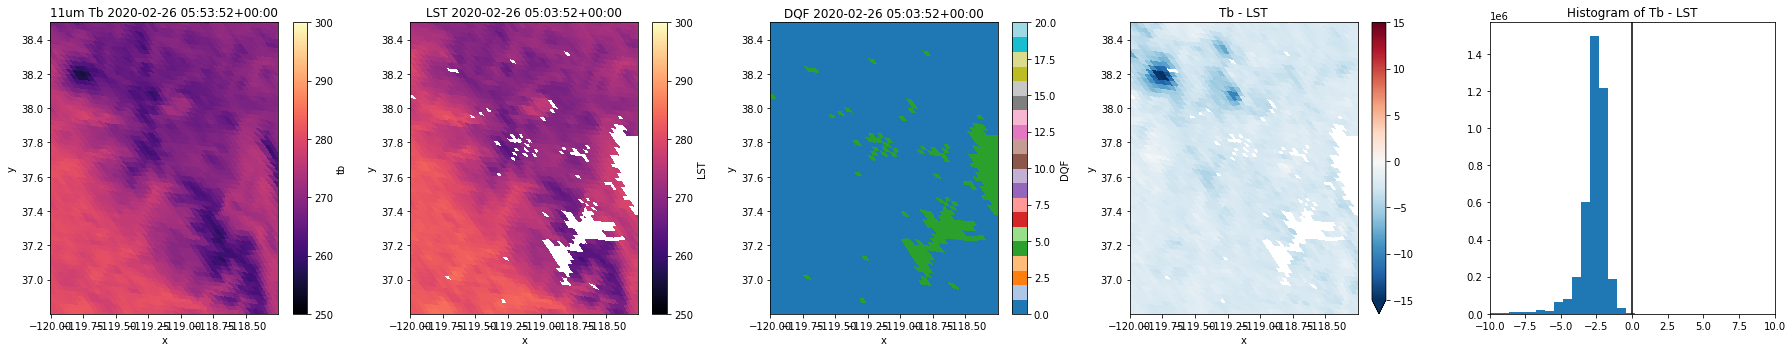

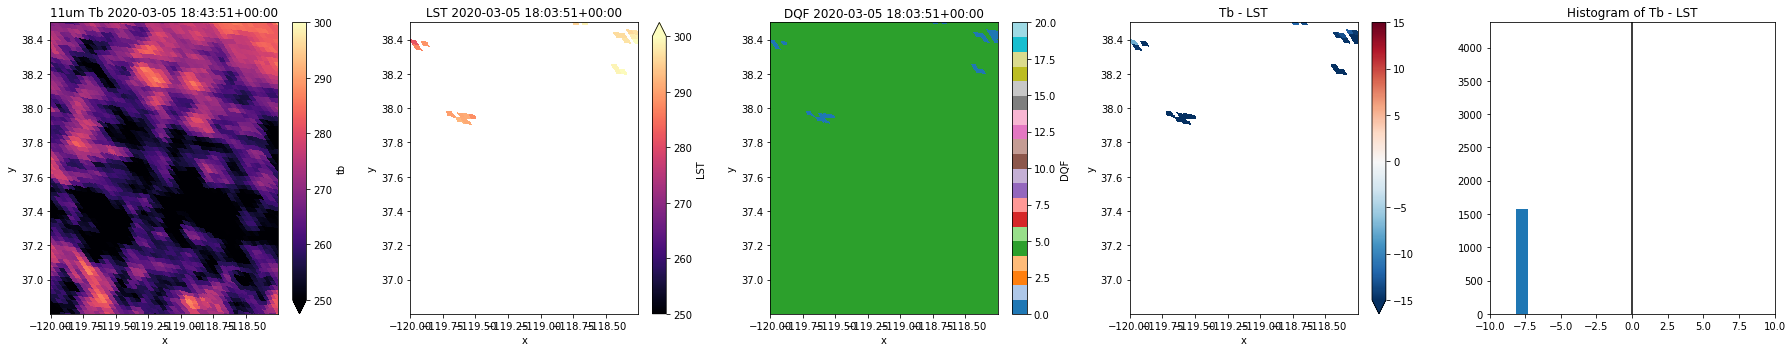

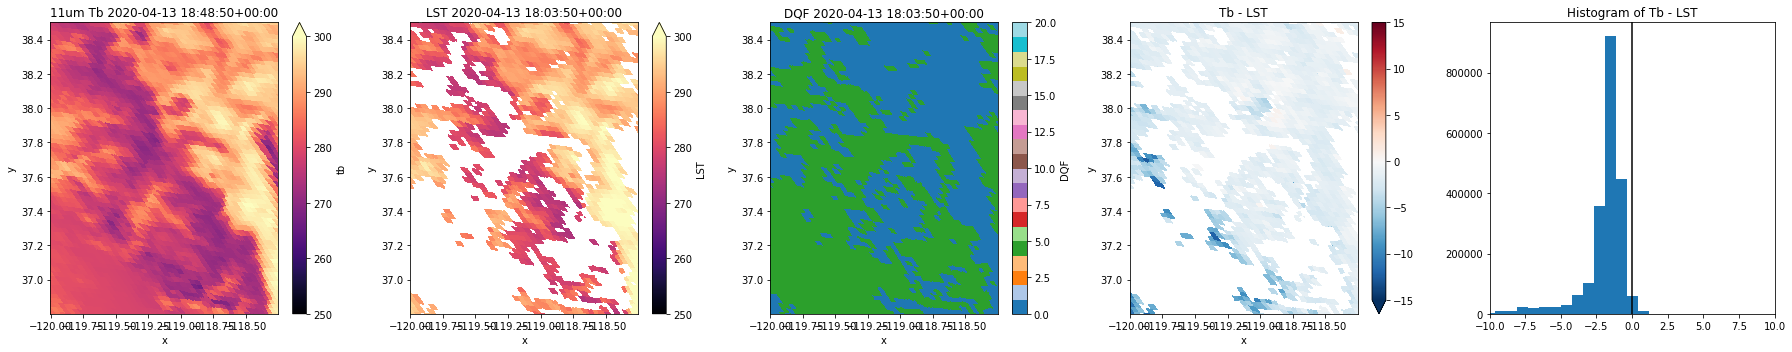

In [551]:
for i, this_lst_timestamp in enumerate(lst_timestamps_list):
    nearest_tb_timestamp = nearest(tb_timestamps_list, this_lst_timestamp)
    #print('LST: {}\nRad: {}\n\n'.format(this_lst_timestamp, nearest_rad_timestamp))
    
    lst_ds = rioxarray.open_rasterio(lst_timestamps[this_lst_timestamp]['filepath'])
    #print(lst_filepaths[30])
    
    dqf_ds = rioxarray.open_rasterio(dqf_timestamps[this_lst_timestamp]['filepath'])
    #print(np.unique(dqf_ds.values))
    
    tb_ds = rioxarray.open_rasterio(tb_timestamps[nearest_tb_timestamp]['filepath'])
    #print(rad_filepaths[111])
    
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5), tight_layout=True)
    tb_ds.plot(ax=ax1, vmin=250, vmax=300, cmap='magma')
    ax1.set_title(f'11um Tb {nearest_tb_timestamp}')
    
    lst_ds.plot(ax=ax2, vmin=250, vmax=300, cmap='magma')
    ax2.set_title(f'LST {this_lst_timestamp}')
    
    dqf_ds.plot(ax=ax3, vmin=0, vmax=20, cmap='tab20')
    ax3.set_title(f'DQF {this_lst_timestamp}')
    
    diff = tb_ds - lst_ds #tb_ds/.993578
    diff.plot(ax=ax4, vmin=-15, vmax=15, cmap='RdBu_r')
    ax4.set_title('Tb - LST');
    
    ax5.hist(diff.values.ravel(),bins=30);
    ax5.axvline(0,linestyle='-',color='k',zorder=999)
    ax5.set_title('Histogram of Tb - LST')
    ax5.set_xlim(-10,10);
    
    lst_ds.close()
    dqf_ds.close()
    tb_ds.close()

---

/storage/GOES/orthorectified/2020/1/7/ABI-L2-LSTC/06/OR_ABI-L2-LSTC-M6_G16_s20200070601176_e20200070603549_c20200070605001_orthorectified_LST.tif
[0. 4.]
/storage/GOES/orthorectified/2020/01/7/ABI-L1b-RadC/06/C14/OR_ABI-L1b-RadC-M6C14_G16_s20200070606176_e20200070608549_c20200070609029_orthorectified_tb.tif


/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


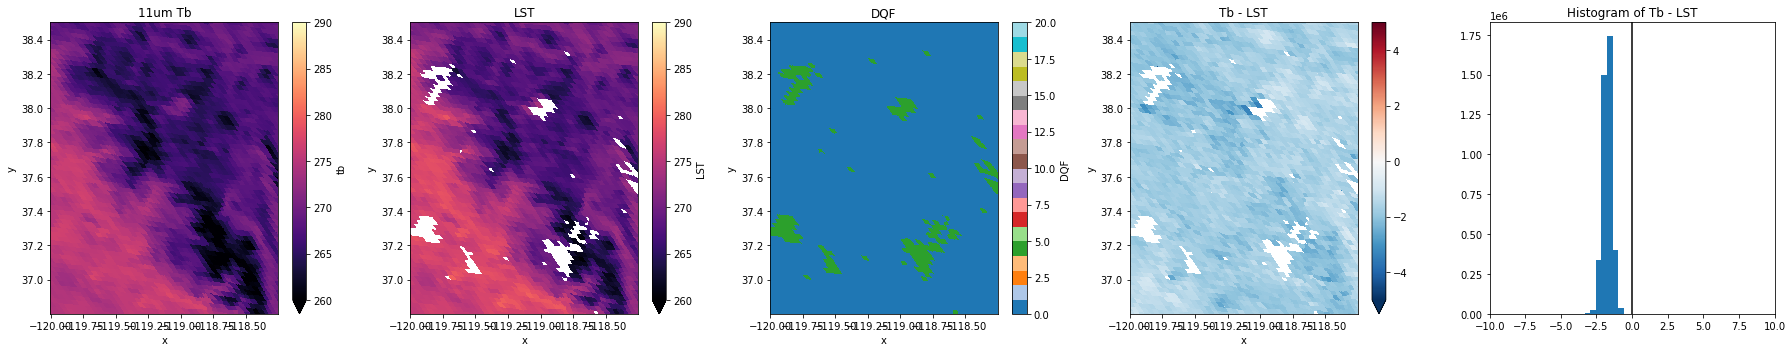

In [204]:
lst_ds = rioxarray.open_rasterio(lst_filepaths[30])
print(lst_filepaths[30])

dqf_ds = rioxarray.open_rasterio(lst_filepaths[31])
print(np.unique(dqf_ds.values))

tb_ds = rioxarray.open_rasterio(rad_filepaths[111])
print(rad_filepaths[111])

fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5), tight_layout=True)
tb_ds.plot(ax=ax1, vmin=260, vmax=290, cmap='magma')
ax1.set_title('11um Tb')

lst_ds.plot(ax=ax2, vmin=260, vmax=290, cmap='magma')
ax2.set_title('LST')

dqf_ds.plot(ax=ax3, vmin=0, vmax=20, cmap='tab20')
ax3.set_title('DQF')

diff = tb_ds - lst_ds #tb_ds/.993578
diff.plot(ax=ax4, vmin=-5, vmax=5, cmap='RdBu_r')
ax4.set_title('Tb - LST');

ax5.hist(diff.values.ravel(),bins=30);
ax5.axvline(0,linestyle='-',color='k',zorder=999)
ax5.set_title('Histogram of Tb - LST')
ax5.set_xlim(-10,10);



In [427]:
0.00156513/(2*np.pi*(11.6-10.8))

0.00031137272010177316

0.99357563


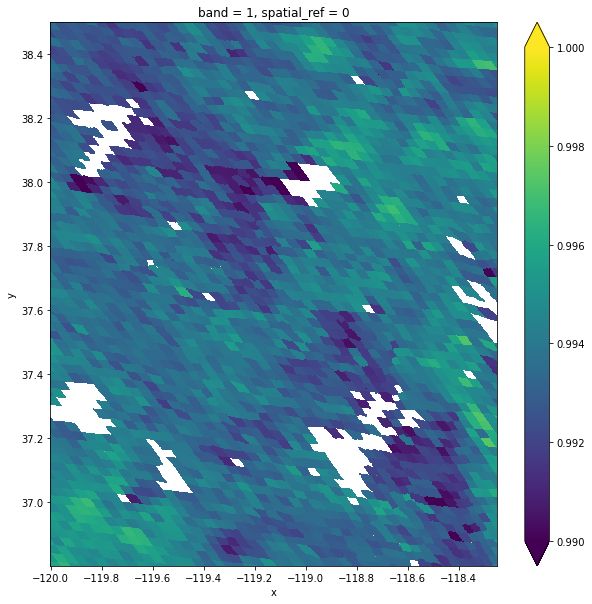

In [211]:
e = tb_ds / lst_ds
plt.figure(figsize=(10,10))
e.plot(vmax=1, vmin=0.99)

print(np.nanmean(e))

In [355]:
rad_band15_filepath = '/storage/GOES/goes16/2020/1/7/ABI-L1b-RadC/06/C15/OR_ABI-L1b-RadC-M6C15_G16_s20200070606176_e20200070608555_c20200070609099_orthorectified_tb.tif'
tb_12_ds = rioxarray.open_rasterio(rad_band15_filepath)
print(rad_band15_filepath)
lst_ds = rioxarray.open_rasterio(lst_filepaths[30])
print(lst_filepaths[30])

dqf_ds = rioxarray.open_rasterio(lst_filepaths[31])
print(np.unique(dqf_ds.values))

tb_11_ds = rioxarray.open_rasterio(rad_filepaths[111])
print(rad_filepaths[111])


/storage/GOES/goes16/2020/1/7/ABI-L1b-RadC/06/C15/OR_ABI-L1b-RadC-M6C15_G16_s20200070606176_e20200070608555_c20200070609099_orthorectified_tb.tif
/storage/GOES/orthorectified/2020/1/7/ABI-L2-LSTC/06/OR_ABI-L2-LSTC-M6_G16_s20200070601176_e20200070603549_c20200070605001_orthorectified_LST.tif
[0. 4.]
/storage/GOES/orthorectified/2020/01/7/ABI-L1b-RadC/06/C14/OR_ABI-L1b-RadC-M6C14_G16_s20200070606176_e20200070608549_c20200070609029_orthorectified_tb.tif


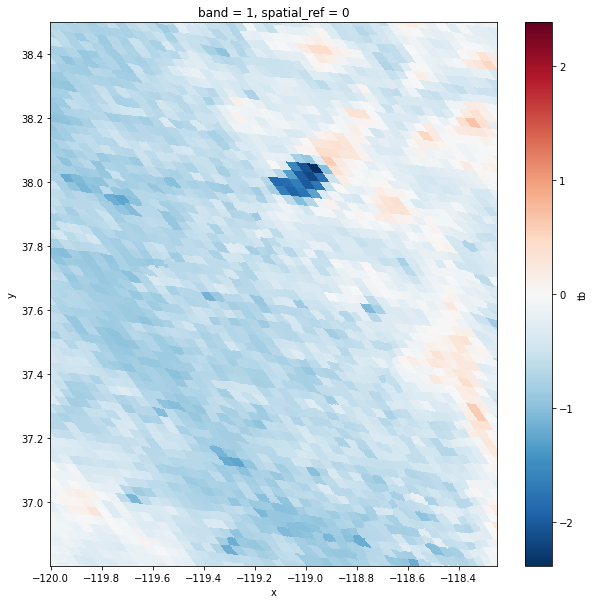

In [356]:
#plt.figure()
#tb_11_ds.plot()
#
#plt.figure()
#tb_12_ds.plot()
#
plt.figure(figsize=(10,10))
(tb_12_ds-tb_11_ds).plot(cmap='RdBu_r')

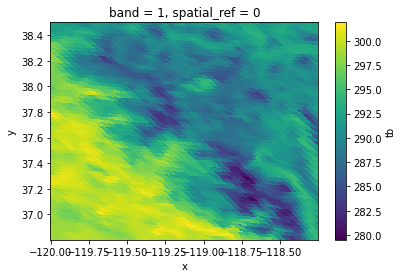

In [357]:
a = tb_11_ds/0.92
a.plot()

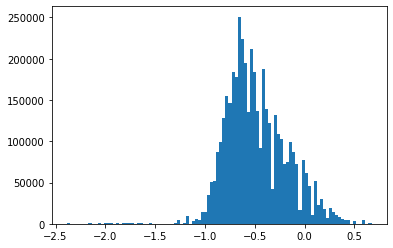

In [358]:
plt.figure()   
plt.hist((tb_12_ds-tb_11_ds).values.ravel(),bins=100);

In [399]:
from goes_utils import planck, planckinv, planck_um

In [422]:
# an emissivity of 99% could account for a > 2K difference between brightness temperature and (true) LST

l = 11.2
T = 273.15
e = .99

radiance = planck(l,T)
brightnesstemp = planckinv(l,radiance*e)
#print(radiance)
print(T)
print(np.round(brightnesstemp,2))
print(np.round(brightnesstemp-T,2))



#l = 11.2
#T = 273.15
#dT = 0.5
#
#print(planck_um(l,T)-planck_um(l,T-dT))
#print(planck_um(l,T+dT)-planck_um(l,T))

273.15
270.42
-2.73


In [398]:
#Tb_11 = tb_11_ds
#Tb_12 = tb_12_ds
#
#e = 0.9
#lza = 0
#lst_day_dry    = splitWindowLST(day_dry, Tb_11, Tb_12, e, lza)
#lst_day_moist  = splitWindowLST(day_moist, Tb_11, Tb_12, e, lza)
#lst_night_dry  = splitWindowLST(night_dry, Tb_11, Tb_12, e, lza)
#lst_night_moist= splitWindowLST(night_moist, Tb_11, Tb_12, e, lza)

In [397]:
#fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(20,20))
#
#[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12] = axes.flatten()
#
#lst_day_dry.plot(ax=ax1)
#ax1.set_title('day dry')
#
#lst_day_moist.plot(ax=ax2)
#ax2.set_title('day moist')
#
#lst_night_dry.plot(ax=ax3)
#ax3.set_title('night dry')
#
#lst_night_moist.plot(ax=ax4)
#ax4.set_title('night moist')
#
#(lst_day_dry-lst_ds).plot(ax=ax5, vmin=-5, vmax=5, cmap='RdBu_r')
#ax5.set_title('day dry')
#
#(lst_day_moist-lst_ds).plot(ax=ax6, vmin=-5, vmax=5, cmap='RdBu_r')
#ax6.set_title('day moist')
#
#(lst_night_dry-lst_ds).plot(ax=ax7, vmin=-5, vmax=5, cmap='RdBu_r')
#ax7.set_title('night dry')
#
#(lst_night_moist-lst_ds).plot(ax=ax8, vmin=-5, vmax=5, cmap='RdBu_r')
#ax8.set_title('night moist')
#
#binnum=50
#ax9.hist((lst_day_dry-lst_ds).values.ravel(),bins=binnum)
#ax10.hist((lst_day_moist-lst_ds).values.ravel(),bins=binnum)
#ax11.hist((lst_night_dry-lst_ds).values.ravel(),bins=binnum)
#ax12.hist((lst_night_moist-lst_ds).values.ravel(),bins=binnum)
#
#for ax in [ax9, ax10, ax11, ax12]:
#    ax.set_xlim(-5,5)
#    ax.axvline(0,linestyle='-',color='k')
#    
#for vals in [lst_day_dry, lst_day_moist, lst_night_dry, lst_night_moist]:
#    print(f"mean difference: {np.round(np.nanmean((vals-lst_ds).values.ravel()),1)}")
#
#    
#plt.figure()   
#plt.hist((tb_12_ds-tb_11_ds).values.ravel(),bins=100);

In [393]:
n=9
m=63
print(lst_filepaths[n].split('/')[-1])
print(lst_filepaths[n+1].split('/')[-1])
print(rad_filepaths[m].split('/')[-1])

OR_ABI-L2-LSTC-M3_G16_s20183530602157_e20183530604530_c20183530605224_orthorectified_LST.tif
OR_ABI-L2-LSTC-M3_G16_s20183530602157_e20183530604530_c20183530605224_orthorectified_DQF.tif
OR_ABI-L1b-RadC-M3C14_G16_s20183530602157_e20183530604530_c20183530604573_orthorectified_tb.tif


/storage/GOES/orthorectified/2018/12/19/ABI-L2-LSTC/06/OR_ABI-L2-LSTC-M3_G16_s20183530602157_e20183530604530_c20183530605224_orthorectified_LST.tif
[0. 4.]
/storage/GOES/orthorectified/2018/12/19/ABI-L1b-RadC/06/C14/OR_ABI-L1b-RadC-M3C14_G16_s20183530602157_e20183530604530_c20183530604573_orthorectified_tb.tif
0.99104613


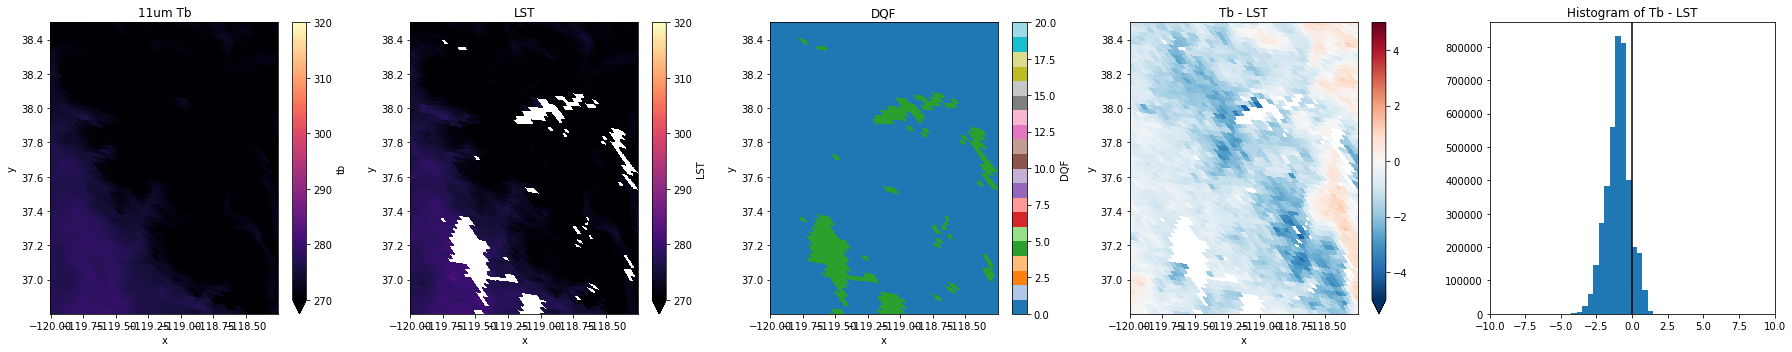

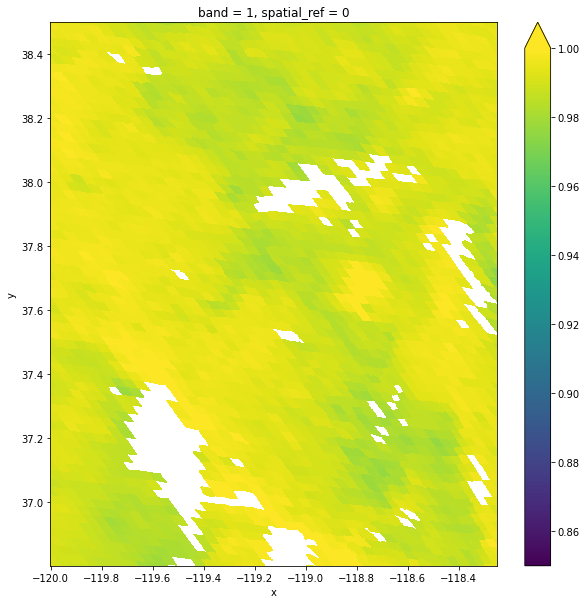

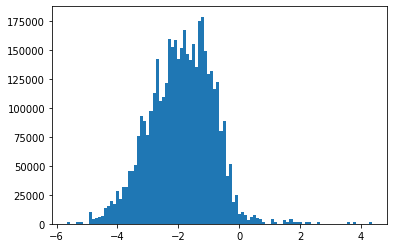

In [394]:

lst_ds = rioxarray.open_rasterio(lst_filepaths[n])
print(lst_filepaths[n])

dqf_ds = rioxarray.open_rasterio(lst_filepaths[n+1])
print(np.unique(dqf_ds.values))

tb_11_ds = rioxarray.open_rasterio(rad_filepaths[m])
print(rad_filepaths[m])


fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5), tight_layout=True)
tb_11_ds.plot(ax=ax1, vmin=270, vmax=320, cmap='magma')
ax1.set_title('11um Tb')

lst_ds.plot(ax=ax2, vmin=270, vmax=320, cmap='magma')
ax2.set_title('LST')

dqf_ds.plot(ax=ax3, vmin=0, vmax=20, cmap='tab20')
ax3.set_title('DQF')

diff = tb_11_ds - lst_ds
diff.plot(ax=ax4, vmin=-5, vmax=5, cmap='RdBu_r')
ax4.set_title('Tb - LST');

ax5.hist(diff.values.ravel(),bins=30);
ax5.axvline(0,linestyle='-',color='k',zorder=999)
ax5.set_title('Histogram of Tb - LST')
ax5.set_xlim(-10,10);


e = tb_ds / lst_ds
plt.figure(figsize=(10,10))
e.plot(vmax=1, vmin=0.85)

print(np.nanmean(e))

plt.figure()   
plt.hist((tb_12_ds-tb_11_ds).values.ravel(),bins=100);

In [395]:
n=39
m=120
print(lst_filepaths[n].split('/')[-1])
print(lst_filepaths[n+1].split('/')[-1])
print(rad_filepaths[m].split('/')[-1])

OR_ABI-L2-LSTC-M6_G16_s20200390601059_e20200390603432_c20200390604422_orthorectified_LST.tif
OR_ABI-L2-LSTC-M6_G16_s20200390601059_e20200390603432_c20200390604422_orthorectified_DQF.tif
OR_ABI-L1b-RadC-M6C14_G16_s20200390606059_e20200390608432_c20200390608481_orthorectified_tb.tif


/storage/GOES/orthorectified/2020/2/8/ABI-L2-LSTC/06/OR_ABI-L2-LSTC-M6_G16_s20200390601059_e20200390603432_c20200390604422_orthorectified_LST.tif
[0. 4.]
/storage/GOES/orthorectified/2020/02/8/ABI-L1b-RadC/06/C14/OR_ABI-L1b-RadC-M6C14_G16_s20200390606059_e20200390608432_c20200390608481_orthorectified_tb.tif
0.9856224


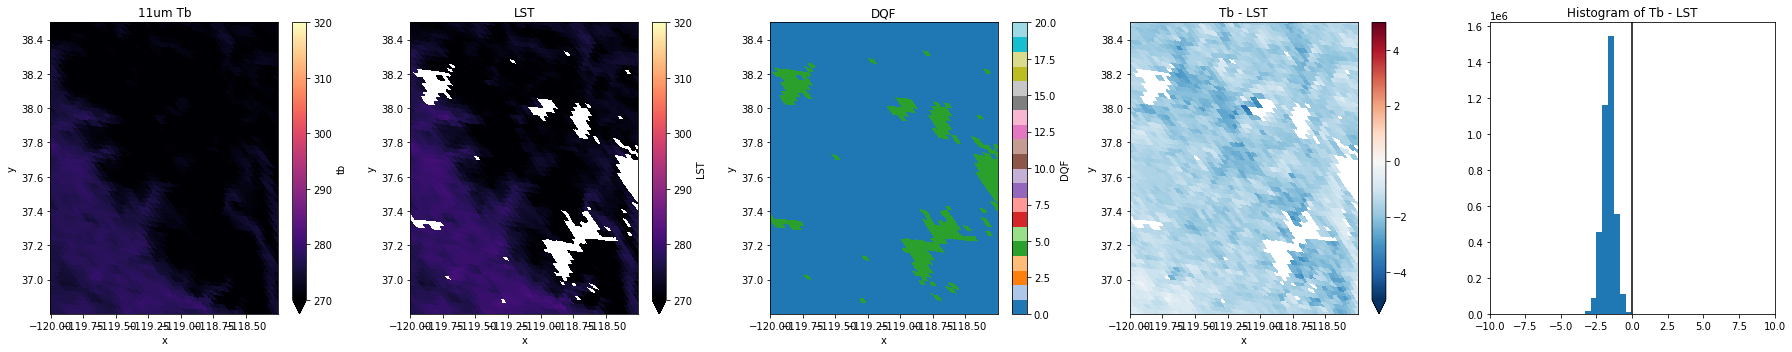

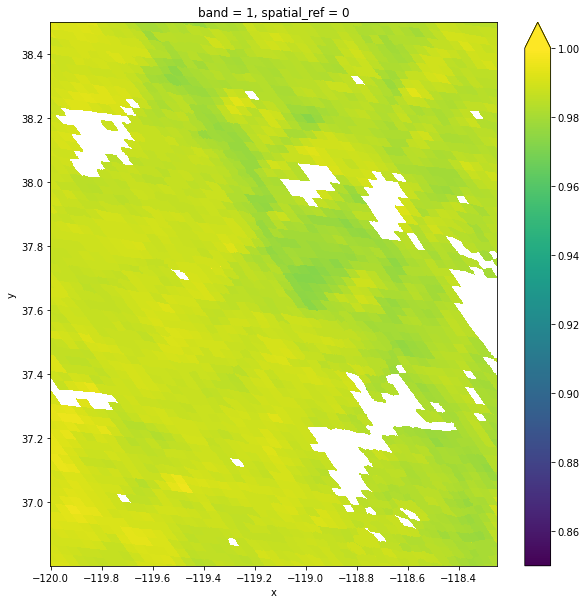

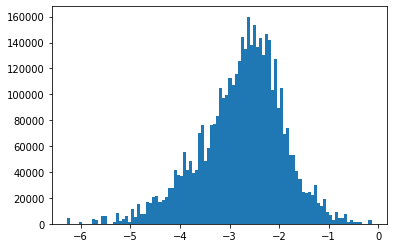

In [396]:

lst_ds = rioxarray.open_rasterio(lst_filepaths[n])
print(lst_filepaths[n])

dqf_ds = rioxarray.open_rasterio(lst_filepaths[n+1])
print(np.unique(dqf_ds.values))

tb_11_ds = rioxarray.open_rasterio(rad_filepaths[m])
print(rad_filepaths[m])


fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5), tight_layout=True)
tb_11_ds.plot(ax=ax1, vmin=270, vmax=320, cmap='magma')
ax1.set_title('11um Tb')

lst_ds.plot(ax=ax2, vmin=270, vmax=320, cmap='magma')
ax2.set_title('LST')

dqf_ds.plot(ax=ax3, vmin=0, vmax=20, cmap='tab20')
ax3.set_title('DQF')

diff = tb_11_ds - lst_ds
diff.plot(ax=ax4, vmin=-5, vmax=5, cmap='RdBu_r')
ax4.set_title('Tb - LST');

ax5.hist(diff.values.ravel(),bins=30);
ax5.axvline(0,linestyle='-',color='k',zorder=999)
ax5.set_title('Histogram of Tb - LST')
ax5.set_xlim(-10,10);


e = tb_ds / lst_ds
plt.figure(figsize=(10,10))
e.plot(vmax=1, vmin=0.85)

print(np.nanmean(e))

plt.figure()   
plt.hist((tb_12_ds-tb_11_ds).values.ravel(),bins=100);

----

In [132]:
ds = xr.open_dataset('/storage/GOES/goes16/2019/4/27/ABI-L2-LSTC/18/OR_ABI-L2-LSTC-M6_G16_s20191171801206_e20191171803579_c20191171804405.nc')

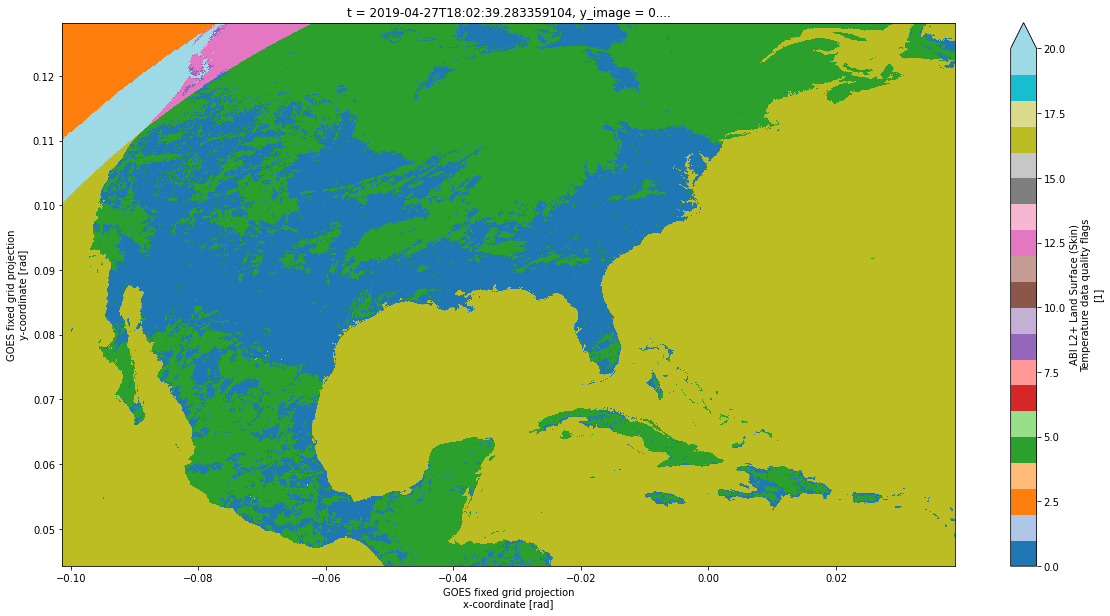

In [138]:
plt.figure(figsize=(20,10))
ds.DQF.plot(vmin=0,vmax=20,cmap='tab20')

In [124]:
ds.DQF.attrs

{'long_name': 'ABI L2+ Land Surface (Skin) Temperature data quality flags',
 'standard_name': 'status_flag',
 'valid_range': array([ 0, 40], dtype=int16),
 'units': '1',
 'grid_mapping': 'goes_imager_projection',
 'cell_methods': 'retrieval_local_zenith_angle: point quantitative_local_zenith_angle: point solar_zenith_angle: point t: point area: point',
 'flag_masks': array([22,  2,  2,  4,  4,  8,  8, 16, 16, 32, 32], dtype=int16),
 'flag_values': array([ 0,  0,  2,  0,  4,  0,  8,  0, 16,  0, 32], dtype=int16),
 'flag_meanings': 'good_retrieval_qf valid_input_data_qf invalid_due_to_bad_or_missing_input_data_qf valid_clear_conditions_qf invalid_due_to_cloudy_conditions_qf valid_LZA_qf degraded_due_to_LZA_threshold_exceeded_qf valid_land_or_inland_water_surface_type_qf invalid_due_to_water_surface_type_qf valid_land_surface_temperature_qf invalid_due_to_out_of_range_land_surface_temperature_qf',
 'number_of_qf_values': 11,
 'percent_good_retrieval_qf': 0.1846098,
 'percent_valid_input_d

good_retrieval_qf 

valid_input_data_qf 

invalid_due_to_bad_or_missing_input_data_qf 

valid_clear_conditions_qf 

invalid_due_to_cloudy_conditions_qf 

valid_LZA_qf 

degraded_due_to_LZA_threshold_exceeded_qf 

valid_land_or_inland_water_surface_type_qf 

invalid_due_to_water_surface_type_qf 

valid_land_surface_temperature_qf 

invalid_due_to_out_of_range_land_surface_temperature_qf

---
---
---

# MODIS Tb and LST

In [428]:
# Open MODIS Radiance from my big dataset
_ds = xr.open_dataset('/storage/spestana/ASTER-MODIS-GOES-DEM-FVEG-FSCA_v6_orthorectified.nc')
print(f'Images at {_ds.isel(time=12).time.values} and {_ds.isel(time=25).time.values} contain high clouds, remove them from dataset')
sel_these = [x for x in range(27) if (x != 25) & (x != 12)]
ds = _ds.isel(time=sel_these)

Images at 2019-03-26T18:51:20.000000000 and 2020-03-05T18:45:35.000000000 contain high clouds, remove them from dataset


In [481]:
# Open my two MODIS LST images
mod21a1n_061_lst = rioxarray.open_rasterio('/storage/spestana/MODIS_lst/MOD21A1N.061_LST_1KM_doy2020007_aid0001.tif')
mod21a1n_061_lst = mod21a1n_061_lst.rio.reproject_match(ds)

mod11a1_061_lst = rioxarray.open_rasterio('/storage/spestana/MODIS_lst/MOD11A1.061_LST_Day_1km_doy2020007_aid0001.tif')
mod11a1_061_lst = mod11a1_061_lst.rio.reproject_match(ds)

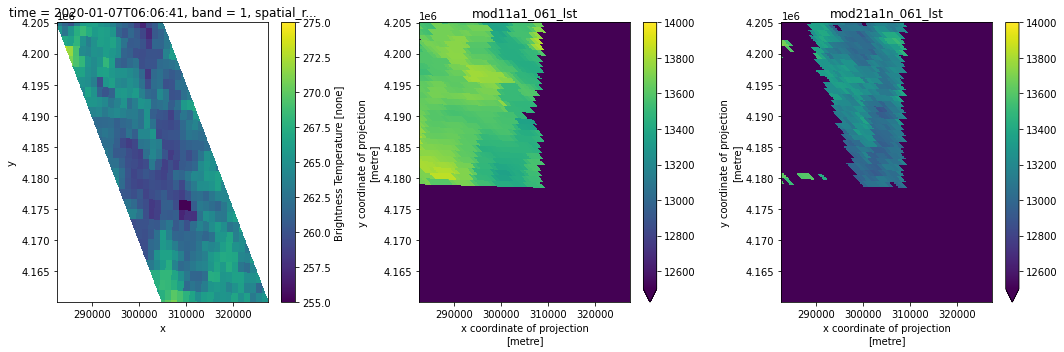

In [485]:
# plot each LST
fig, [ax, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(15,5), tight_layout=True)
ds.isel(time=18).ast_mod_modis_tb.plot(ax=ax, vmin=255, vmax=275)
ds.isel(time=17).ast_mod_modis_tb.plot(ax=ax, vmin=255, vmax=275, add_colorbar=False)

mod11a1_061_lst.plot(ax=ax2, vmin=12500, vmax=14000)
ax2.set_title('mod11a1_061_lst');

mod21a1n_061_lst.plot(ax=ax3, vmin=12500, vmax=14000)
ax3.set_title('mod21a1n_061_lst');

<xarray.DataArray 'ast_mod_modis_tb' ()>
array(262.80835, dtype=float32)
Coordinates:
    time         datetime64[ns] 2020-01-07T06:06:50
    band         int64 ...
    spatial_ref  int64 ...


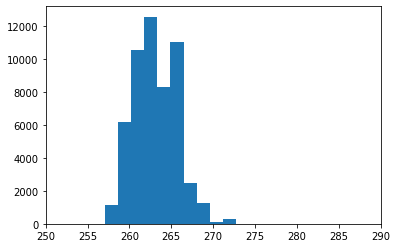

In [495]:
plt.hist(ds.isel(time=18).ast_mod_modis_tb.values.ravel())
plt.xlim(250,290)
print(ds.isel(time=18).ast_mod_modis_tb.median())

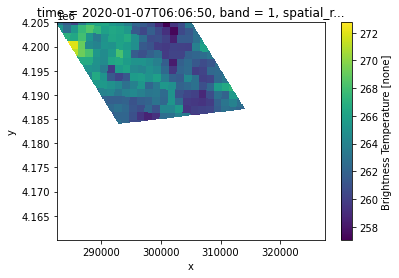